In [132]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix

import matplotlib.pyplot as plt

# Below is based on SPACY class

In [133]:
df=pd.read_csv('C:/Users/Public.DESKTOP-6RBQT7L/Desktop/Programming - Maths/SPACY IITians course/003 - Logistic Regression/loans.csv')

In [134]:
df.head()

,accepted,creditscore,amount,age,marital,health_ins,creditgrade
0,0,387,42580093,87,0,0,A
1,0,400,80816186,49,0,1,A
2,0,360,37264552,46,1,0,A
3,0,378,7209235,38,1,0,A
4,0,387,71637479,51,1,0,A


In [135]:
df.describe()

,accepted,creditscore,amount,age,marital,health_ins
count,2500.000000,2500.000000,2.500000e+03,2500.000000,2500.000000,2500.000000
mean,0.518800,286.824400,3.364925e+07,58.156400,0.494800,0.440000
std,0.499746,74.884278,2.897636e+07,21.082678,0.500073,0.496486
min,0.000000,100.000000,5.113590e+05,18.000000,0.000000,0.000000
25%,0.000000,246.000000,8.954224e+06,40.000000,0.000000,0.000000
50%,1.000000,298.000000,2.360884e+07,61.000000,0.000000,0.000000
75%,1.000000,343.250000,5.592593e+07,76.000000,1.000000,1.000000
max,1.000000,400.000000,9.995992e+07,90.000000,1.000000,1.000000


In [136]:
df['accepted'].value_counts()

1    1297
0    1203
Name: accepted, dtype: int64

In [137]:
x=df[['creditscore']] #Let's assume that only CREDIT-SCORE is impacting YES/NO decision

y=df[['accepted']]

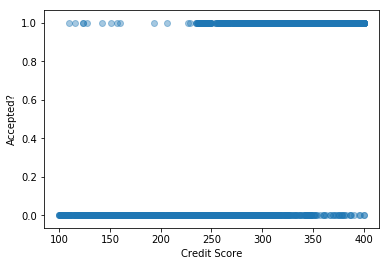

In [138]:
plt.scatter(x,y,alpha=0.4)
plt.xlabel('Credit Score')
plt.ylabel('Accepted?')
plt.show()

In [139]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [140]:
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [141]:
logistic_model = LogisticRegression()

In [142]:
logistic_model.fit(x_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [143]:
y_prediction = logistic_model.predict(x_test)

In [144]:
print(type(y_prediction))

print(y_prediction[:5]) # You can see that all values are 0 or 1

<class 'numpy.ndarray'>
[1 0 1 0 0]


In [145]:
print(accuracy_score(y_test, y_prediction))

0.8


In [146]:
logistic_model.predict_proba(x_test)[:10]

# these are the probabilities of individual values in x_test. So 1st row has probability of 0.16 for '0' and 0.84 for '1'
# The threshold by default is 0.5. So anything above 0.5 will be classified as '1'. So 1st observation has been assigned '1'

# here each row has probability of belonging to '0' and '1'. i.e. probability q and 1-q

array([[0.16651999, 0.83348001],
       [0.62436039, 0.37563961],
       [0.48623537, 0.51376463],
       [0.94624415, 0.05375585],
       [0.91975081, 0.08024919],
       [0.08203427, 0.91796573],
       [0.05932025, 0.94067975],
       [0.87018706, 0.12981294],
       [0.27550452, 0.72449548],
       [0.59242745, 0.40757255]])

In [147]:
# Let's add more independent variables apart from CREDIT-SCORE

In [148]:
x = df[['creditscore', 'amount','age','marital','health_ins']] #adding more independent variables

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

logistic_model.fit(x_train, y_train)

y_prediction = logistic_model.predict(x_test)

print(accuracy_score(y_test, y_prediction))

''' You can clearly see that accuracy has increased now '''

0.96


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


' You can clearly see that accuracy has increased now '

In [149]:
print(logistic_model.intercept_)
print(logistic_model.coef_)

[-4.42259858]
[[ 6.39089738 -4.88315189 -0.73205043  1.33858038  3.90840535]]


# Below is based on Edureka video: https://www.youtube.com/watch?v=VCJdg7YBbAQ&t=1s

In [162]:
# Logistic Regression on Titanic data

In [163]:
titanic_data = pd.read_csv('C:/Users/Public.DESKTOP-6RBQT7L/Desktop/Programming - Maths/SPACY IITians course/Titanic data/train.csv')

In [164]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [165]:
import seaborn as sns

In [166]:
print("Number of passengers:", len(titanic_data['PassengerId']))

Number of passengers: 891


In [167]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


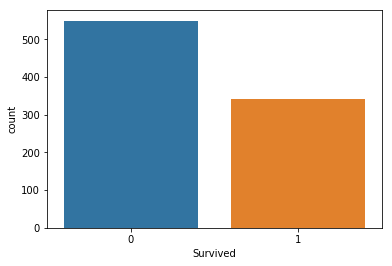

In [168]:
sns.countplot(x='Survived', data=titanic_data) #plot of survived column

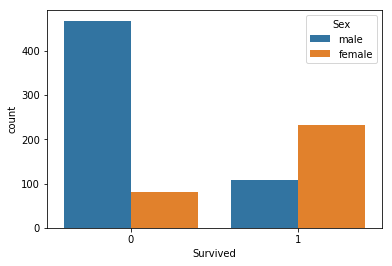

In [169]:
sns.countplot(x='Survived', hue = 'Sex', data = titanic_data)

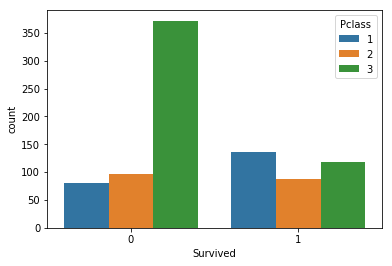

In [170]:
sns.countplot(x='Survived', hue = 'Pclass', data = titanic_data)

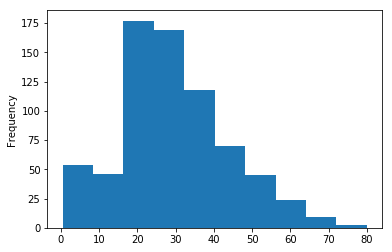

In [171]:
titanic_data['Age'].plot.hist() #shows more of young passengers were traveling

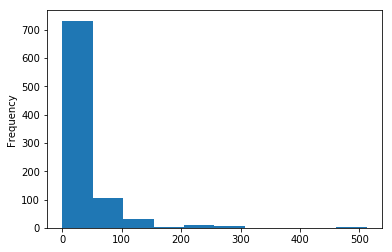

In [172]:
titanic_data['Fare'].plot.hist()

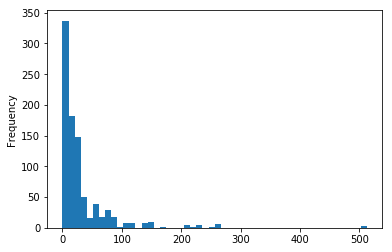

In [173]:
titanic_data['Fare'].plot.hist(bins = 50)

In [174]:
titanic_data.isnull().head(10) #returns True or False if value is null or not-null

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
5,False,False,False,False,False,True,False,False,False,False,True,False
6,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,True,False
8,False,False,False,False,False,False,False,False,False,False,True,False
9,False,False,False,False,False,False,False,False,False,False,True,False


In [175]:
titanic_data.isnull().sum() #shows NULL values for each column

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

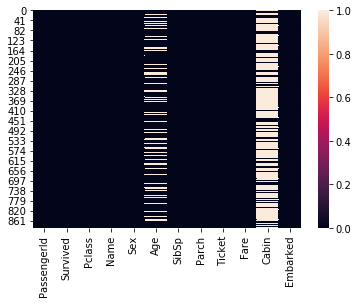

In [176]:
 sns.heatmap(titanic_data.isnull()) #heatmap of the same isnull.sum()

In [177]:
# Drop all the rows with Null values

titanic_data.dropna(inplace=True)

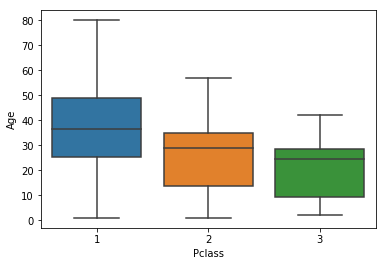

In [178]:
sns.boxplot(x='Pclass', y='Age', data = titanic_data)

#shows 1st class (more expensive) had more older people, while 3rd class (cheapest) had more younger people

In [179]:
# Let's drop not required columns
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S


In [180]:
titanic_data.drop('Cabin', axis=1, inplace=True)

In [181]:
# Get dummy values for some columns.

pd.get_dummies(titanic_data['Sex']).head(5)

,female,male
1,1,0
3,1,0
6,0,1
10,1,0
11,1,0


In [182]:
gender = pd.get_dummies(titanic_data['Sex'], drop_first=True)

gender.head(5)

#This drops 'female' column. So Male = 1 means male, and male = 0 means female

,male
1,0
3,0
6,1
10,0
11,0


In [183]:
# Now remove 'Sex' column and concatenate the 'gender' dummy

titanic_data.drop(['Sex'], axis=1, inplace=True)

titanic_data = pd.concat ( [titanic_data, gender], axis=1 )



titanic_data.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Embarked,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,S,0
6,7,0,1,"McCarthy, Mr. Timothy J",54.0,0,0,17463,51.8625,S,1
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",4.0,1,1,PP 9549,16.7000,S,0
11,12,1,1,"Bonnell, Miss. Elizabeth",58.0,0,0,113783,26.5500,S,0


In [184]:
# Logistic Regression

x = titanic_data[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'male']]
y = titanic_data[['Survived']]

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

from sklearn.linear_model import LogisticRegression

logistic_model = LogisticRegression()

logistic_model.fit(x_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [185]:
y_prediction = logistic_model.predict(x_test)

In [186]:
from sklearn.metrics import classification_report

classification_report(y_test, y_prediction)

'              precision    recall  f1-score   support\n\n           0       0.60      0.86      0.71         7\n           1       0.96      0.87      0.91        30\n\n   micro avg       0.86      0.86      0.86        37\n   macro avg       0.78      0.86      0.81        37\nweighted avg       0.89      0.86      0.87        37\n'

In [187]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_prediction)

array([[ 6,  1],
       [ 4, 26]], dtype=int64)

In [188]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_prediction)

0.8648648648648649

In [ ]:
# You can also try training of model on the 100% of dataset and use testing on another dataset